In [1]:
from preprocessing import (grayzation, 
                           binarization,
                           pdf_file_to_array,
                           bytes_file_to_array,
                           visualize_images)
from detection import (get_nodes,
                       get_cells,
                       get_lines_Hough,
                       get_cells_detr,
                       get_cells_maskrcnn, 
                       get_tables_detr,
                       get_tables_maskrcnn,
                       resize_tables_cells,
                       visualize_table_images, 
                       visualize_tables_lines,
                       visualize_tables_nodes,
                       visualize_cells)
from builder import (visualize_headers_and_records_cells,
                     split_into_headers_and_records_maskrcnn,
                     split_into_headers_and_records,
                     create_cell_dict,
                     build_structure,
                     fill_structure,
                     split_records,
                     visualize_cells_relationship)
from export import make_serialized_structure, save
from recognition import osr_detection
import os
import cv2
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [2]:
import time

def extract(file):
    low_dpi = 50
    high_dpi = 300
    # high_quality_images_array = bytes_file_to_array(file, high_dpi)
    # low_quality_images_array = bytes_file_to_array(file, low_dpi)

    start_time = time.time()
    high_quality_images_array = pdf_file_to_array(file, high_dpi)
    elapsed_time = time.time() - start_time
    print(f"high_quality_images_array {elapsed_time} seconds")

    start_time = time.time()
    low_quality_images_array = pdf_file_to_array(file, low_dpi)
    elapsed_time = time.time() - start_time
    print(f"low_quality_images_array {elapsed_time} seconds")

    # input_folder = os.path.join(os.getcwd(), "input", "cache")
    # high_quality_images_array = [cv2.imread(os.path.join(input_folder, "000124.jpg"))]
    # low_quality_images_array = [cv2.imread(os.path.join(input_folder, "000124.jpg"))]

    start_time = time.time()
    high_quality_gray_images_array = grayzation(high_quality_images_array)
    elapsed_time = time.time() - start_time
    print(f"high_quality_gray_images_array {elapsed_time} seconds")

    visualize_images(high_quality_images_array)
    
    start_time = time.time()
    low_quality__gray_images_array = grayzation(low_quality_images_array)
    elapsed_time = time.time() - start_time
    print(f"low_quality_gray_images_array {elapsed_time} seconds")

    start_time = time.time()
    thresholded_images_array = binarization(high_quality_gray_images_array)
    elapsed_time = time.time() - start_time
    print(f"thresholded_images_array {elapsed_time} seconds")

    high_quality_gray_images_array = grayzation(high_quality_images_array)
    low_quality__gray_images_array = grayzation(low_quality_images_array)

    start_time = time.time()
    tables, low_tables = get_tables_maskrcnn(low_quality__gray_images_array,
                                    low_dpi,
                                    high_quality_gray_images_array,
                                    high_dpi)
    elapsed_time = time.time() - start_time
    print(f"tables maskrcnn {elapsed_time} seconds")

    visualize_table_images(tables)

    # start_time = time.time()
    # tables, _ = get_tables_detr(low_quality_images_array,
    #                                 low_dpi,
    #                                 high_quality_images_array,
    #                                 high_dpi)
    # elapsed_time = time.time() - start_time
    # print(f"tables detr {elapsed_time} seconds")

    # visualize_table_images(tables)

    # start_time = time.time()
    # tables_cells = get_cells_maskrcnn(tables)
    # elapsed_time = time.time() - start_time
    # print(f"tables_cells {elapsed_time} seconds")

    # visualize_cells(tables, tables_cells)

    start_time = time.time()
    tables_lines = get_lines_Hough(low_tables)
    visualize_tables_lines(low_tables, tables_lines)
    tables_nodes = get_nodes(low_tables, tables_lines)
    visualize_tables_nodes(low_tables, tables_nodes)
    tables_cells = get_cells(low_tables, tables_nodes)
    elapsed_time = time.time() - start_time
    print(f"get cells Hough {elapsed_time} seconds")
    
    visualize_cells(low_tables, tables_cells)

    tables_cells = resize_tables_cells(tables_cells, low_dpi, high_dpi)

    visualize_cells(tables, tables_cells)

    start_time = time.time()
    table_cell_text = osr_detection(tables, tables_cells)
    elapsed_time = time.time() - start_time
    print(f"table_cell_text {elapsed_time} seconds")
    
    start_time = time.time()
    structure = make_serialized_structure(tables, tables_cells, table_cell_text)
    elapsed_time = time.time() - start_time
    print(f"results {elapsed_time} seconds")

    start_time = time.time()
    save(structure, 'yaml', file)
    elapsed_time = time.time() - start_time
    print(f"save {elapsed_time} seconds")

    # high_quality_images_array = pdf_file_to_array(file, high_dpi)
    # low_quality_images_array = pdf_file_to_array(file, low_dpi)
    # visualize_images(high_quality_images_array)

    # high_quality_gray_images_array = grayzation(high_quality_images_array)
    # low_quality__gray_images_array = grayzation(low_quality_images_array)
    # thresholded_images_array = binarization(high_quality_gray_images_array)
    # tables, _ = get_tables_maskrcnn(low_quality_images_array,
    #                              low_dpi,
    #                              high_quality_images_array,
    #                              high_dpi)
    # visualize_table_images(tables)

    # tables_cells = get_cells_maskrcnn(tables)
    # visualize_cells(tables, tables_cells)

    # split_into_headers_and_records_maskrcnn(tables[0], tables_cells[0])
    # table_cell_text = osr_detection(tables, tables_cells)
    
    # start_time = time.time()
    # table_cell_text = osr_detection(tables, tables_cells)
    # elapsed_time = time.time() - start_time
    # print(f"table_cell_text {elapsed_time} seconds")

    # results = make_serialized_structure(tables, tables_cells, table_cell_text)
    # save(results, 'yaml', file)

    return tables, low_tables

high_quality_images_array 0.5190713405609131 seconds
low_quality_images_array 0.06647682189941406 seconds
high_quality_gray_images_array 0.005502223968505859 seconds


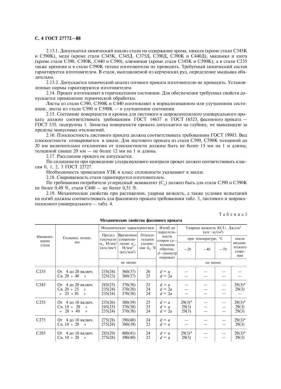

low_quality_gray_images_array 0.0010008811950683594 seconds
thresholded_images_array 0.0010063648223876953 seconds
tables maskrcnn 4.10920786857605 seconds


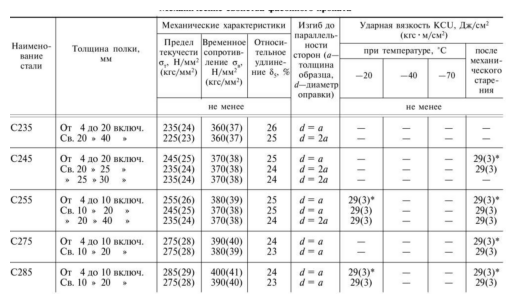

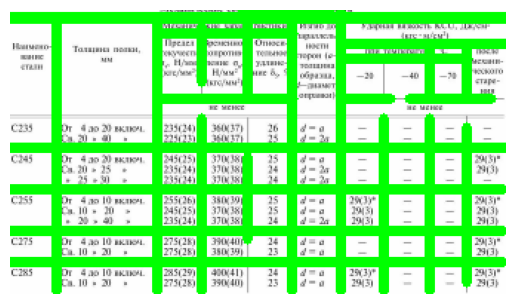

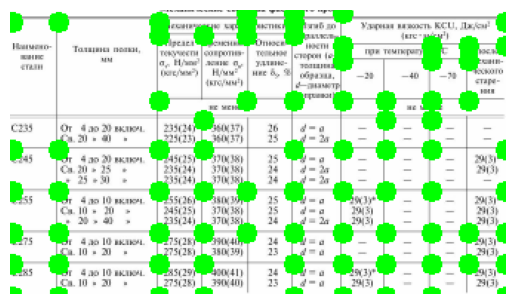

get cells Hough 0.15503144264221191 seconds


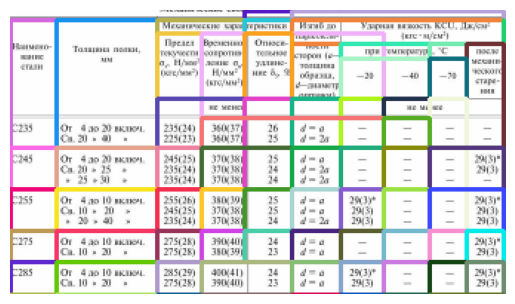

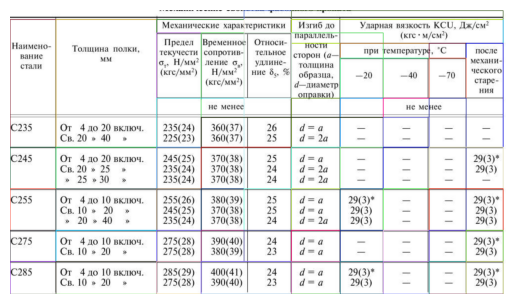

table_cell_text 20.409600734710693 seconds
results 0.0019998550415039062 seconds
save 0.008001089096069336 seconds


In [3]:
input_folder = os.getcwd() + "\input"
pdf_files = [os.path.join(input_folder, file) for file in os.listdir(input_folder) if file.endswith(".pdf")]
file = pdf_files[0]
table, low_tables = extract(file)

### Hough

In [9]:
import numpy as np

In [30]:
def extract_lines(image):
    copy_image = image.copy()
    height, width = copy_image.shape
    _, threshold_image = cv2.threshold(copy_image, 200, 255, cv2.THRESH_BINARY)
    inverted_image = cv2.bitwise_not(threshold_image)

    # Horizontal
    hor = np.array([[1, 1, 1, 1, 1, 1]])
    vertical_lines_eroded_image = cv2.erode(
        inverted_image, hor, iterations=1)
    vertical_lines_eroded_image = cv2.dilate(
        vertical_lines_eroded_image, hor, iterations=1)

    # Vertical
    ver = np.array([[1],
                    [1],
                    [1],
                    [1],
                    [1],
                    [1],
                    [1]])
    horizontal_lines_eroded_image = cv2.erode(
        inverted_image, ver, iterations=1)
    horizontal_lines_eroded_image = cv2.dilate(
        horizontal_lines_eroded_image, ver, iterations=1)

    # Combine
    combined_image = cv2.add(
        vertical_lines_eroded_image, horizontal_lines_eroded_image)

    # Dilate
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))
    combined_image_dilated = cv2.dilate(
        combined_image, kernel, iterations=5)

    return combined_image_dilated

In [44]:
def get_lines_Hough_local(tables):
    tables_lines = []
    iterations = 1

    # Parameters for cv2.HoughLinesP
    parameters = [
        {'rho': 1, 'theta': np.pi / 180, 'threshold': 20, 'minLineLength': 30, 'maxLineGap': 10},
        {'rho': 1, 'theta': np.pi / 180, 'threshold': 20, 'minLineLength': 40, 'maxLineGap': 15},
        {'rho': 1, 'theta': np.pi / 180, 'threshold': 20, 'minLineLength': 50, 'maxLineGap': 20},
        # Add more sets of parameters if needed
    ]

    for num, image in enumerate(tables):
        combined_image_dilated = extract_lines(image)

        height, width = image.shape

        tables_lines = []

        for params in parameters:
            lines = cv2.HoughLinesP(
                combined_image_dilated,
                params['rho'],
                params['theta'],
                params['threshold'],
                None,
                params['minLineLength'],
                params['maxLineGap']
            )

            # Recurrent function for checking structures for emptiness
            def is_not_empty_element(structure):
                if isinstance(structure, list) or isinstance(structure, np.ndarray):
                    return any(is_not_empty_element(item) for item in structure)
                elif isinstance(structure, int) or isinstance(structure, np.intc):
                    return True
                else:
                    return False

            # Finding all vertical and horizontal lines of a table
            vertical_lines = []
            horizontal_lines = []

            if is_not_empty_element(lines):
                borders = np.concatenate(lines, axis=0)

                # Tolerance parameters at which we consider that the lines are even and intersect
                epsilon = (height + width) * 0.01
                for x1, y1, x2, y2 in borders:
                    if abs(x1 - x2) <= epsilon and abs(y1 - y2) > epsilon:  # Vertical lines
                        vertical_lines.append((int((x1 + x2) / 2), height - y1, 
                                            int((x1 + x2) / 2), height - y2))
                        
                    elif abs(y1 - y2) <= epsilon and abs(x1 - x2) > epsilon:  # Horizontal lines
                        horizontal_lines.append((int(x1), height - int((y1 + y2) / 2), 
                                                int(x2), height - int((y1 + y2) / 2)))

                tables_lines.append((vertical_lines, horizontal_lines))
            else:
                tables_lines.append(([], []))

            # Visualize results
            visualize_tables_lines([image], tables_lines)

    # # Visualize in three columns
    # num_columns = len(parameters) + 1  # Add one for the original image
    # fig, axs = plt.subplots(len(tables), num_columns, figsize=(15, 5))
    # for i, (image, table_lines) in enumerate(zip(tables, tables_lines)):
    #     axs[i, 0].imshow(image, cmap='gray')
    #     axs[i, 0].axis('off')
    #     axs[i, 0].set_title('Original')

    #     for j, params in enumerate(parameters):
    #         visualize_tables_lines([image], [table_lines])
    #         # axs[i, j + 1].set_title(f'Threshold={params["threshold"]}, MinLength={params["minLineLength"]}, MaxGap={params["maxLineGap"]}')

    # plt.show()

['c:\\Users\\dsash\\Repository\\TableExtraction\\table_extraction\\input\\000033.png', 'c:\\Users\\dsash\\Repository\\TableExtraction\\table_extraction\\input\\000034.png', 'c:\\Users\\dsash\\Repository\\TableExtraction\\table_extraction\\input\\000195.jpg']


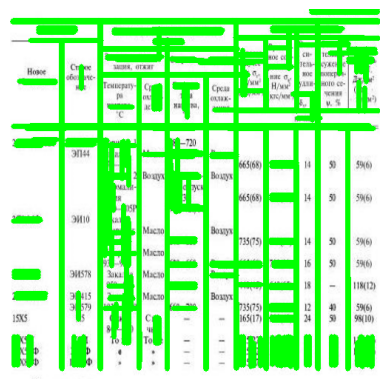

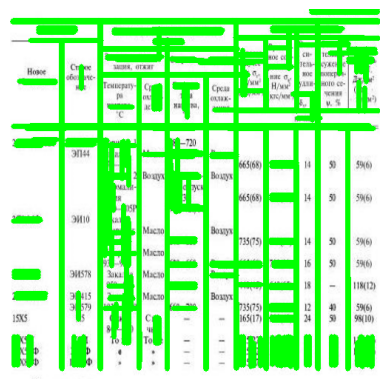

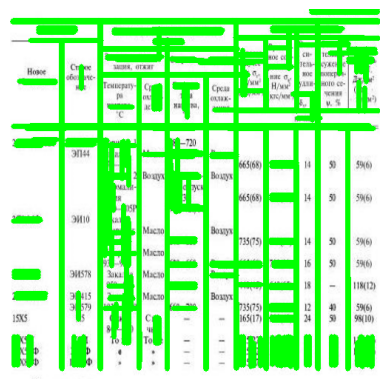

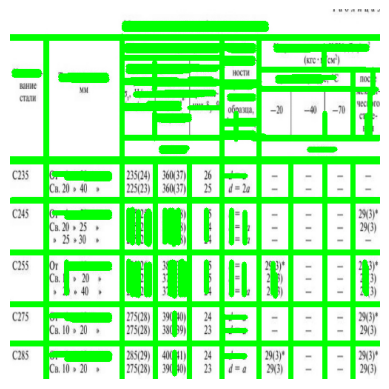

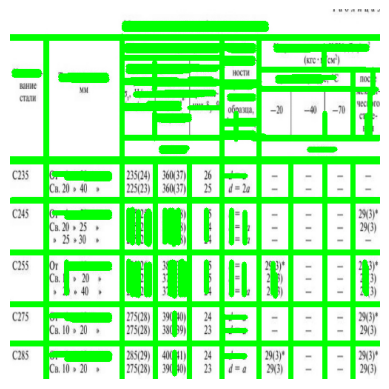

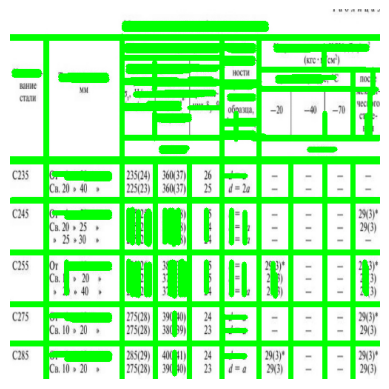

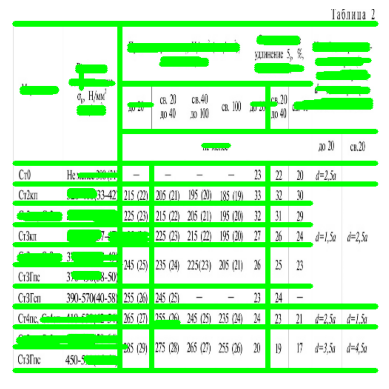

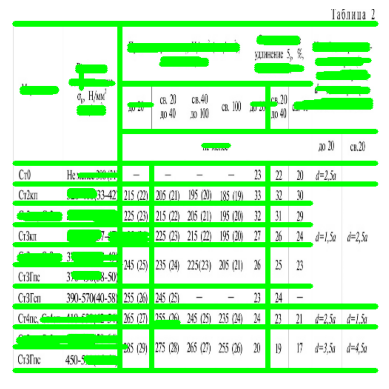

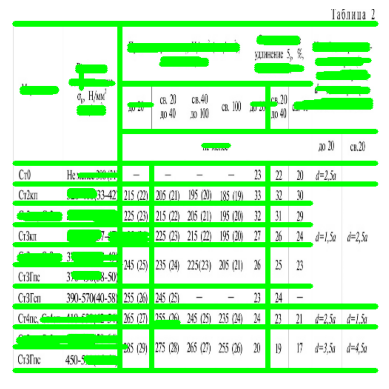

In [45]:
input_folder = os.getcwd() + "\input"
images = [os.path.join(input_folder, file) for file in os.listdir(input_folder) if file.endswith(".png") or file.endswith(".jpg")]

print(images)
img1 = cv2.cvtColor(cv2.imread(images[0]), cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(cv2.imread(images[1]), cv2.COLOR_BGR2GRAY)
img3 = cv2.cvtColor(cv2.imread(images[2]), cv2.COLOR_BGR2GRAY)

common_width = 500
common_height = 500

# Make sure all images are of the same size
img1 = cv2.resize(img1, (common_width, common_height))
img2 = cv2.resize(img2, (common_width, common_height))
img3 = cv2.resize(img3, (common_width, common_height))

tables = [img1, img2, img3]
get_lines_Hough_local(tables)

### TATR

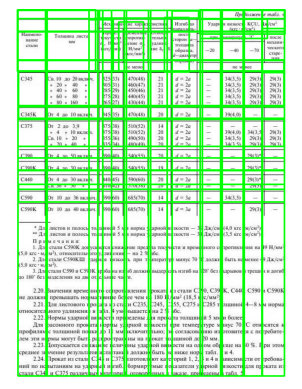

In [8]:
from transformer.core import TableRecognizer
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import torch
import cv2
import os

m = TableRecognizer(
    checkpoint_path= os.path.join(os.getcwd(), 'transformer', 'TATR-v1.1-All-msft.pth'),
    mode='structure'
)

input_folder = os.path.join(os.getcwd(), "input", "cache") 
# input_folder = os.path.join(os.getcwd(), "input") 

image = Image.open(os.path.join(input_folder, "000124.jpg")).convert("RGB")

results = m.predict(image_path=image)
output_image = results["debug_image"]

plt.imshow(output_image)
plt.axis('off')
plt.show()

# tables_cells = []

# for idx, score in enumerate(results["scores"].tolist()):
#     if score < 0.93:
#         continue
    
#     xmin, ymin, xmax, ymax = list(map(int, results["boxes"][idx]))
#     tables_cells.append([xmin, ymin, xmax, ymax])

# # tables_cells = results['boxes'].to(torch.int).tolist()

# print("results", tables_cells)

In [9]:
# results["scores"].tolist()
# for label in results["labels"].tolist():
#     print(f"{model.config.id2label[label]}")
results["labels"].tolist()

[2,
 2,
 5,
 5,
 2,
 5,
 5,
 1,
 2,
 4,
 2,
 5,
 4,
 2,
 5,
 2,
 5,
 5,
 2,
 5,
 5,
 1,
 2,
 5,
 5,
 5,
 5,
 1,
 2,
 5,
 5,
 3,
 5,
 5,
 5,
 1,
 2,
 5,
 5,
 2,
 5,
 2,
 2,
 5,
 2,
 5,
 5,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 5,
 2,
 5,
 5,
 1,
 5,
 5,
 5,
 2,
 1,
 2,
 5,
 2,
 5,
 4,
 2,
 2,
 2,
 5,
 1,
 2,
 2,
 5,
 5,
 5,
 1,
 5,
 5,
 5,
 2,
 5,
 0,
 2,
 5,
 2,
 5,
 5,
 2,
 5,
 2,
 2,
 2,
 1,
 5,
 5,
 2,
 5,
 2,
 5,
 5,
 5,
 1,
 2,
 5,
 5,
 2,
 5,
 5,
 2,
 2,
 5,
 5,
 2,
 5,
 2,
 2,
 2,
 5,
 2,
 2,
 5]

In [82]:
tables_cells[:1]

[[98, 12, 282, 590]]

In [6]:
input_folder = os.path.join(os.getcwd(), "input", "cache")
image = cv2.imread(os.path.join(input_folder, "000124.jpg"))
image.shape

(672, 514, 3)

In [96]:
from typing import List, Tuple

def visualize_cells_local(tables: List[np.ndarray],
                         tables_cells: List[List[Tuple[int, int, int, int]]]) -> None:
    for image, cells in zip(tables, tables_cells):
        # copy_image = image.copy()
        for cell in cells:
            copy_image = image.copy()
            x1, y1, x2, y2 = cell
            # xc, yc, w, h = cell
            print(x1, y1, x2, y2)
            # Draw cell on the image
            cv2.rectangle(copy_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            # cv2.rectangle(copy_image, (xc - h/2, yc - w/2), (xc + h/2, yc - w/2), (0, 255, 0), 2)

            # Display the image with cells
            plt.imshow(copy_image)
            plt.axis('off')
            plt.show()

108 5 286 191


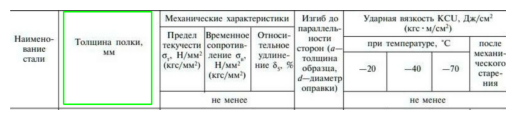

699 167 1000 192


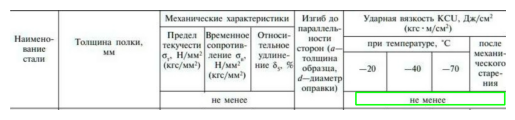

278 18 387 179


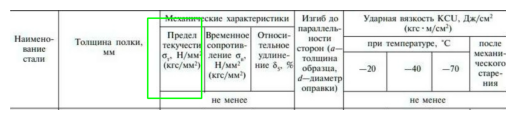

861 5 922 192


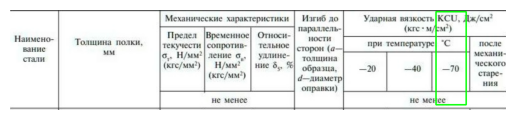

101 9 284 177


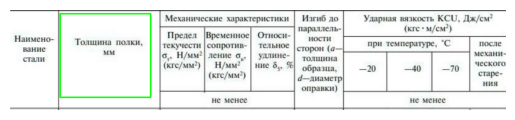

577 6 684 191


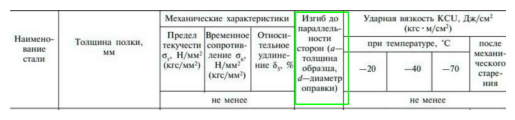

687 5 771 192


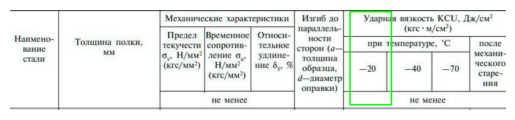

766 5 861 192


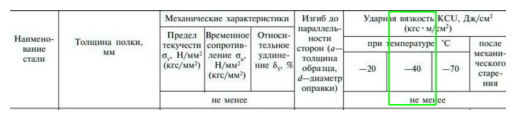

6 47 1000 80


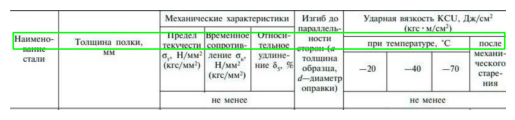

381 34 489 183


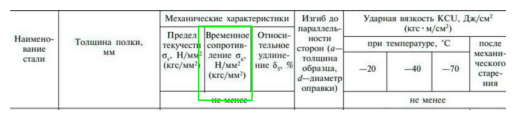

922 5 1001 192


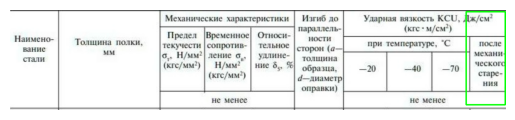

314 167 580 192


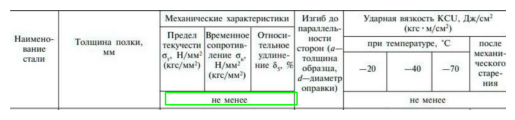

6 80 1001 165


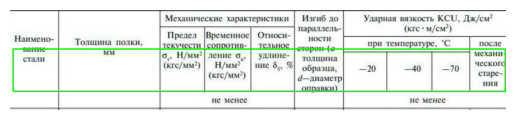

287 6 389 191


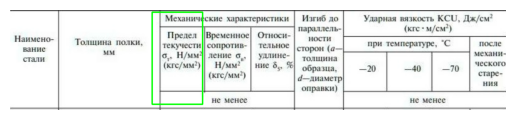

687 5 1001 42


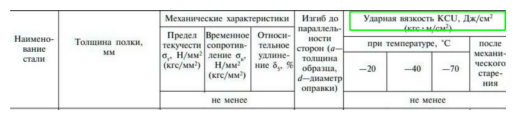

490 5 573 191


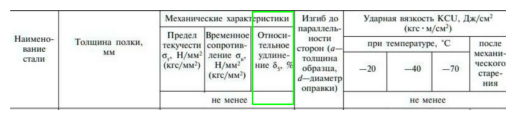

483 21 573 177


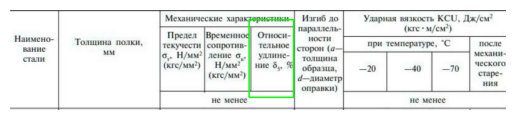

6 6 1000 192


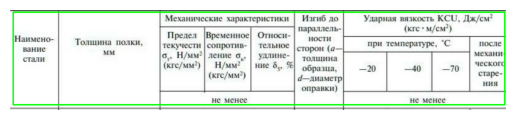

6 164 1000 192


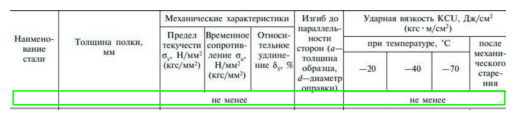

391 5 489 191


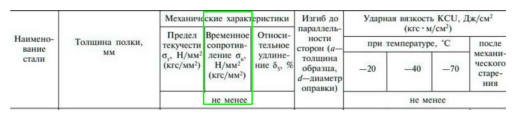

6 6 106 192


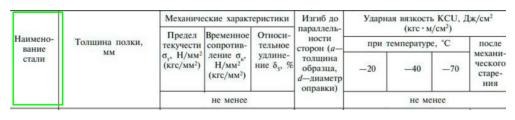

6 5 1000 42


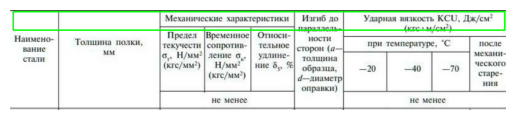

In [99]:
image = cv2.imread(os.path.join(input_folder, "000034.jpg"))

visualize_cells_local([image], [tables_cells])

### Research methods of parrallelic realisation

In [1]:
import time
import random

def process_image(image):
    n = random.randint(1, 5)
    time.sleep(n)
    return(image)

if __name__ == "__main__":
    images = [1, 2, 3, 4, 5]
    result = []

    start_time = time.time()
    for image in images:
        result.append(process_image(image))
    end_time = time.time()
    print("Time:", end_time - start_time, "seconds")
    print("Result", result)

Time: 18.002220153808594 seconds
Result [1, 2, 3, 4, 5]


In [16]:
import time
import random
from concurrent.futures import ThreadPoolExecutor

def process_image(image):
    n = random.randint(1, 5)
    time.sleep(n)
    # Здесь мы возвращаем пару (ключ, значение)
    return image, n

if __name__ == "__main__":
    images = [1, 2, 3, 4, 5]

    start_time = time.time()
    with ThreadPoolExecutor() as executor:
        results = dict(executor.map(process_image, images))
    end_time = time.time()
    print("Time:", end_time - start_time, "seconds")
    print("Results:", results)

Time: 5.004392623901367 seconds
Results: [1, 2, 3, 4, 5]


In [ ]:
import time
import random
import multiprocessing as mp
from concurrent.futures import ProcessPoolExecutor

def process_image(image):
    n = random.randint(1, 5)
    print(image, n)
    time.sleep(n)
    # Здесь мы возвращаем пару (ключ, значение)
    return image, n

if __name__ == "__main__":
    images = [1, 2, 3]  # Замените на ваш список изображений

    with ProcessPoolExecutor(max_workers=mp.cpu_count()) as executor:
        results = list(executor.map(process_image, images))

    for image, n in results:
        print(f"Image processed with random value: {n}")

In [12]:
import concurrent.futures
import random
import time

nums = [1,2,3,4,5,6,7,8,9,10]

def f(x):
    n = random.randint(1, 5)
    print(x, n)
    time.sleep(n)
    return x * x
def main():
    # Make sure the map and function are working
    print([val for val in map(f, nums)])

    # Test to make sure concurrent map is working
    with concurrent.futures.ProcessPoolExecutor() as executor:
        print([val for val in executor.map(f, nums)])

if __name__ == '__main__':
    main()

1 4
2 3
3 3
4 5
5 2
6 3
7 5
8 3
9 4
10 5
[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


BrokenProcessPool: A process in the process pool was terminated abruptly while the future was running or pending.

### Poppler

In [ ]:
import os
import platform
import subprocess

def get_poppler_path():
    system = platform.system()
    
    if system == 'Windows':
        # На Windows, вы можете использовать "where" для поиска исполняемого файла
        result = subprocess.check_output("where pdfinfo", shell=True)
        pdfinfo_path = result.decode("utf-8").strip()
        poppler_path = os.path.dirname(pdfinfo_path)
        return poppler_path
    elif system == 'Linux':
        # На Linux, вы можете проверить путь к исполняемому файлу
        result = subprocess.check_output("which pdfinfo", shell=True)
        pdfinfo_path = result.decode("utf-8").strip()
        poppler_path = os.path.dirname(pdfinfo_path)
        return poppler_path
    else:
        # Другие операционные системы
        print("Unsupported OS")
        exit()

poppler_path = get_poppler_path()
print(poppler_path)

### Quantization of MASK-RCNN

In [10]:
import torch
import torchvision
from torch.quantization import quantize, prepare
import numpy as np
import torch.nn as nn

from PIL import Image
from maskrcnn import infer_utils
# from infer_utils import get_outputs
from torchvision.transforms import transforms as transforms
from maskrcnn.class_names import INSTANCE_CATEGORY_NAMES, CELLS_CATEGORY_NAMES

In [17]:
model = torchvision.models.detection.maskrcnn_resnet50_fpn_v2(
    pretrained=False, num_classes=91
)
class_names = CELLS_CATEGORY_NAMES
# class_names = INSTANCE_CATEGORY_NAMES

model.roi_heads.box_predictor.cls_score = nn.Linear(in_features=1024, out_features=len(class_names), bias=True)
model.roi_heads.box_predictor.bbox_pred = nn.Linear(in_features=1024, out_features=len(class_names)*4, bias=True)
model.roi_heads.mask_predictor.mask_fcn_logits = nn.Conv2d(256, len(class_names), kernel_size=(1, 1), stride=(1, 1))

# Set the computation device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize the model
weights = os.path.join(os.getcwd(), "maskrcnn", "weights", "best_cell_detection.pth")
ckpt = torch.load(weights, map_location=device)
model.load_state_dict(ckpt['model'])
model.to(device).eval()

MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
         

In [18]:
quantized_model = torch.quantization.quantize_dynamic(model, dtype=torch.qint8)

In [19]:
torch.save(quantized_model.state_dict(), 'best_cell_detection_quantized_model.pth')